In [2]:
import matplotlib.pyplot as plt
import numpy as np
from spyci import spyci

In [65]:
# Run outside container
def run_ngspice(spice_file):
    """Run ngspice simulation in the OSIC container"""
    import os
    container_name = f"iic-osic-tools_shell_uid_{os.getuid()}"
    ngspice_path = "/foss/tools/bin/ngspice"
    
    !docker exec {container_name} {ngspice_path} -b {spice_file}

run_ngspice("tt10-fp-adc8/xschem/simulation/strongArmLatch_tb.spice")


Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /foss/designs/tt10-fp-adc8/xschem/strongarmlatch_tb.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
n                                            1
p                                          1.8
vdd                                        1.8
x1.net4                                1.20053
x1.net3                                    1.8
x1.net1                                    1.8
clk                                          0
out                 

In [63]:
# Run outside container
# ! docker exec iic-osic-tools_shell_uid_$(id -u) /foss/tools/bin/ngspice -b tt10-fp-adc8/xschem/simulation/strongArmLatch_tb.spice
! cp ../../tb_strongArmLatch.raw .

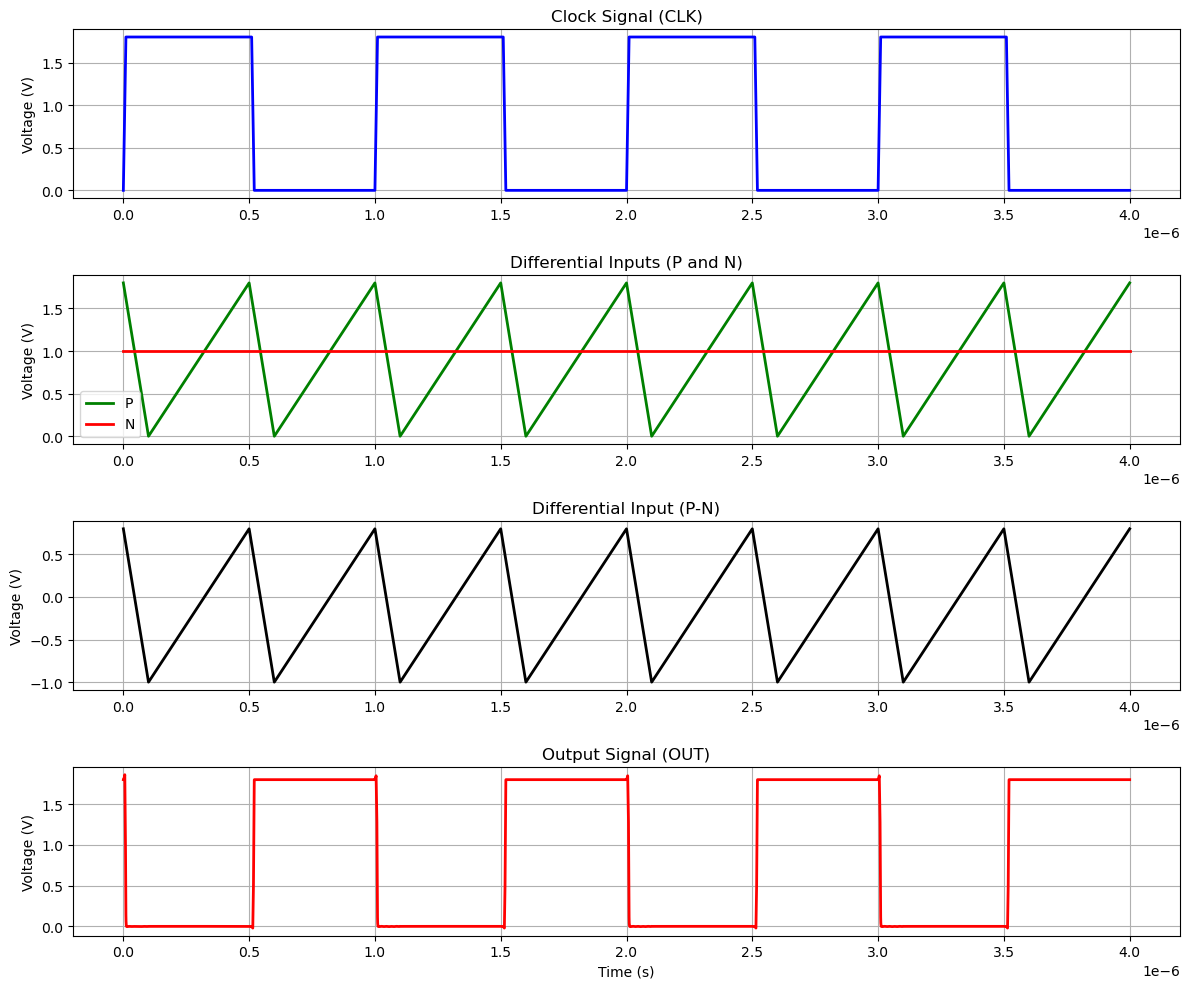

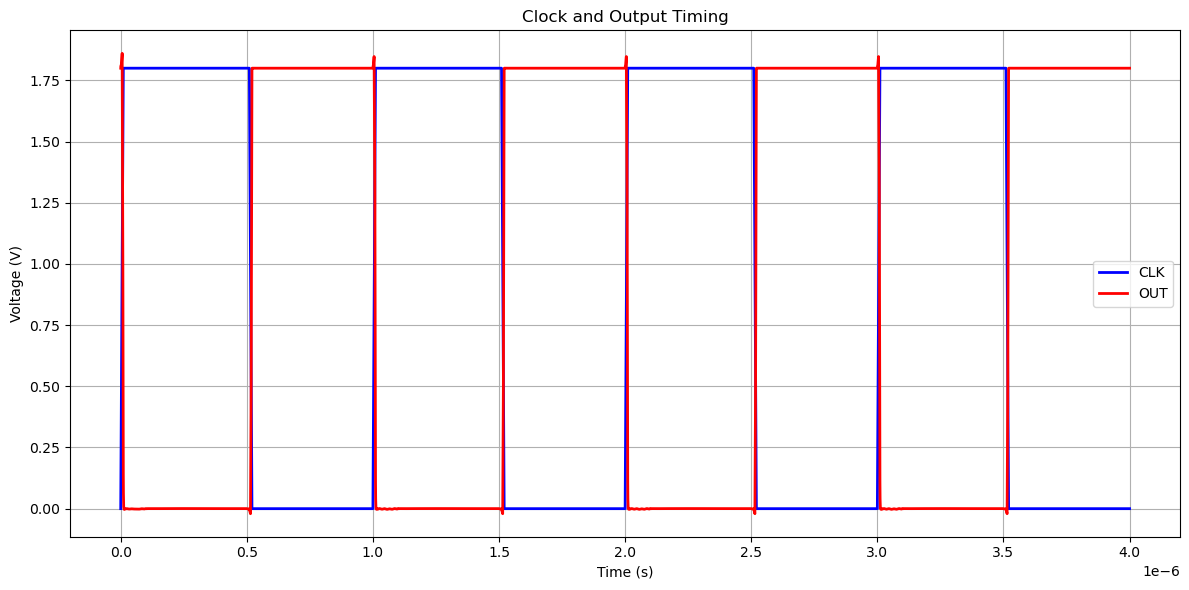

In [ ]:
# Load raw spice data
data = spyci.load_raw("tb_strongArmLatch.raw")  # Update with your actual raw file name if different

# Extract time and voltage values
time = np.real(data['values']['time'])  # Extract real part of time
v_clk = np.real(data['values']['v(clk)'])  # Extract real part of v(clk)
v_n = np.real(data['values']['v(n)'])  # Extract real part of v(n)
v_p = np.real(data['values']['v(p)'])  # Extract real part of v(p)
v_out = np.real(data['values']['v(out)'])  # Extract real part of v(out)

# Create figure with subplots
plt.figure(figsize=(12, 10))

# Plot CLK signal
plt.subplot(4, 1, 1)
plt.plot(time, v_clk, 'b-', linewidth=2)
plt.title('Clock Signal (CLK)')
plt.ylabel('Voltage (V)')
plt.grid(True)

# Plot P and N signals
plt.subplot(4, 1, 2)
plt.plot(time, v_p, 'g-', linewidth=2, label='P')
plt.plot(time, v_n, 'r-', linewidth=2, label='N')
plt.title('Differential Inputs (P and N)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()

# Plot differential input (P-N)
plt.subplot(4, 1, 3)
plt.plot(time, v_p - v_n, 'k-', linewidth=2)
plt.title('Differential Input (P-N)')
plt.ylabel('Voltage (V)')
plt.grid(True)

# Plot OUT signal
plt.subplot(4, 1, 4)
plt.plot(time, v_out, 'r-', linewidth=2)
plt.title('Output Signal (OUT)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create a second figure for timing analysis
plt.figure(figsize=(12, 6))
plt.plot(time, v_clk, 'b-', linewidth=2, label='CLK')
plt.plot(time, v_out, 'r-', linewidth=2, label='OUT')
plt.title('Clock and Output Timing')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()

# Optional: Add annotations to highlight key timing points
# Uncomment if you want to add specific annotations
"""
# Find clock rising edges (you may need to adjust the threshold)
clock_rises = np.where(np.diff(np.int32(v_clk > 2.5)) > 0)[0]
for i, idx in enumerate(clock_rises[:5]):  # Annotate first 5 clock rises
    plt.axvline(time[idx], color='gray', linestyle='--', alpha=0.5)
    plt.text(time[idx], 5.2, f'Rise {i+1}', rotation=90)
"""

plt.tight_layout()
plt.show()